# Speech Emotion Recognition ML

## Import Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download ejlok1/toronto-emotional-speech-set-tess
! kaggle datasets download  cracc97/features
! kaggle datasets download ejlok1/surrey-audiovisual-expressed-emotion-savee
! kaggle datasets download uwrfkaggler/ravdess-emotional-speech-audio
! kaggle datasets download ejlok1/cremad

100% 428M/428M [00:20<00:00, 24.0MB/s]
100% 428M/428M [00:20<00:00, 22.3MB/s]
 95% 35.0M/36.8M [00:02<00:00, 22.5MB/s]
100% 36.8M/36.8M [00:02<00:00, 13.7MB/s]
 98% 105M/107M [00:05<00:00, 22.8MB/s]
100% 107M/107M [00:05<00:00, 19.3MB/s]
100% 428M/429M [00:18<00:00, 24.4MB/s]
100% 429M/429M [00:18<00:00, 24.1MB/s]
100% 451M/451M [00:21<00:00, 23.8MB/s]
100% 451M/451M [00:21<00:00, 22.3MB/s]


In [4]:
mkdir dataset/

In [5]:
import os

# Specify the path to the dataset folder
dataset_path = "dataset"

# Create the dataset folder if it doesn't exist
if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

# List of folders to create
folders = ["CREMA-D", "TESS", "RAVDESS", "SAVEE","Features"]

# Create the specified folders inside the dataset folder
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    os.makedirs(folder_path)

print("Folders created successfully.")

Folders created successfully.


In [6]:
!unzip /content/toronto-emotional-speech-set-tess.zip -d /content/dataset/TESS
!unzip /content/features.zip -d /content/dataset/Features
!unzip /content/cremad.zip -d /content/dataset/CREMA-D
!unzip /content/ravdess-emotional-speech-audio.zip -d /content/dataset/RAVDESS
!unzip /content/surrey-audiovisual-expressed-emotion-savee.zip -d /content/dataset/SAVEE

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_DFA_DIS_XX.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_DFA_FEA_XX.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_DFA_HAP_XX.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_DFA_NEU_XX.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_DFA_SAD_XX.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_IEO_ANG_HI.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_IEO_ANG_LO.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_IEO_ANG_MD.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_IEO_DIS_HI.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_IEO_DIS_LO.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_IEO_DIS_MD.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_IEO_FEA_HI.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_IEO_FEA_LO.wav  
  inflating: /content/dataset/CREMA-D/AudioWAV/1072_

## Load the Dataset

In [7]:
TESS = "/content/dataset/TESS/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
RAV = "/content/dataset/RAVDESS/audio_speech_actors_01-24/"
SAVEE = "/content/dataset/SAVEE/ALL/"
CREMA = "/content/dataset/CREMA-D/AudioWAV/"

In [8]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    else:
        continue
    path.append(SAVEE + i)

# Now check out the label count distribution
SAVEE_df = pd.DataFrame(emotion, columns = ['label'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['speech'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


,label,speech
0,angry,/content/dataset/SAVEE/ALL/JK_a01.wav
1,neutral,/content/dataset/SAVEE/ALL/JK_n11.wav
2,sad,/content/dataset/SAVEE/ALL/JE_sa10.wav
3,sad,/content/dataset/SAVEE/ALL/JK_sa02.wav
4,neutral,/content/dataset/SAVEE/ALL/JE_n02.wav


In [9]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            continue
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['label'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['speech'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


,label,speech
0,happy,/content/dataset/TESS/tess toronto emotional s...
1,happy,/content/dataset/TESS/tess toronto emotional s...
2,happy,/content/dataset/TESS/tess toronto emotional s...
3,happy,/content/dataset/TESS/tess toronto emotional s...
4,happy,/content/dataset/TESS/tess toronto emotional s...


In [10]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = []

for actor in dir:

    files = os.listdir(RAV + actor)

    for file in files:
        part = file.split('.')[0]
        part = part.split("-")

        temp = int(part[6])

        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        else:
           continue

        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path])
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])


RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['label', 'speech']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['label', 'speech']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


,label,speech
0,sad,/content/dataset/RAVDESS/audio_speech_actors_0...
1,angry,/content/dataset/RAVDESS/audio_speech_actors_0...
2,happy,/content/dataset/RAVDESS/audio_speech_actors_0...
3,happy,/content/dataset/RAVDESS/audio_speech_actors_0...
4,angry,/content/dataset/RAVDESS/audio_speech_actors_0...


In [11]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files:
    part = file.split('_')

    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'
    else:
        continue

    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path])
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])

CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['label', 'speech']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['label', 'speech']

print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


,label,speech
0,angry,/content/dataset/CREMA-D/AudioWAV//1073_DFA_AN...
1,sad,/content/dataset/CREMA-D/AudioWAV//1089_TAI_SA...
2,neutral,/content/dataset/CREMA-D/AudioWAV//1037_ITS_NE...
3,angry,/content/dataset/CREMA-D/AudioWAV//1074_WSI_AN...
4,happy,/content/dataset/CREMA-D/AudioWAV//1076_TSI_HA...


#### Dataframe Creation

In [12]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

In [13]:
df = pd.concat([Males,Females],axis = 0)

In [14]:
df

,label,speech
0,angry,/content/dataset/SAVEE/ALL/JK_a01.wav
1,neutral,/content/dataset/SAVEE/ALL/JK_n11.wav
2,sad,/content/dataset/SAVEE/ALL/JE_sa10.wav
3,sad,/content/dataset/SAVEE/ALL/JK_sa02.wav
4,neutral,/content/dataset/SAVEE/ALL/JE_n02.wav
...,...,...
2307,sad,/content/dataset/CREMA-D/AudioWAV//1079_DFA_SA...
2308,sad,/content/dataset/CREMA-D/AudioWAV//1072_IEO_SA...
2309,sad,/content/dataset/CREMA-D/AudioWAV//1029_IOM_SA...
2310,angry,/content/dataset/CREMA-D/AudioWAV//1056_WSI_AN...


In [15]:
df['label'].value_counts()

angry      1923
sad        1923
happy      1923
neutral    1703
Name: label, dtype: int64

### Data Analysis

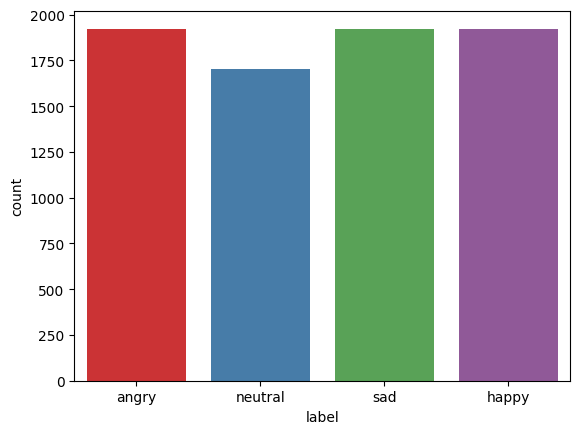

In [16]:
sns.countplot(data=df, x='label', palette='Set1')
plt.show()

#### Functions to show waveforms

In [17]:
# Define a function to create a waveform plot
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    plt.plot(data, lw=0.5)  # Plot the waveform directly using matplotlib
    plt.show()

# Define a function to create a spectrogram
def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

#### Visualize the Waveforms

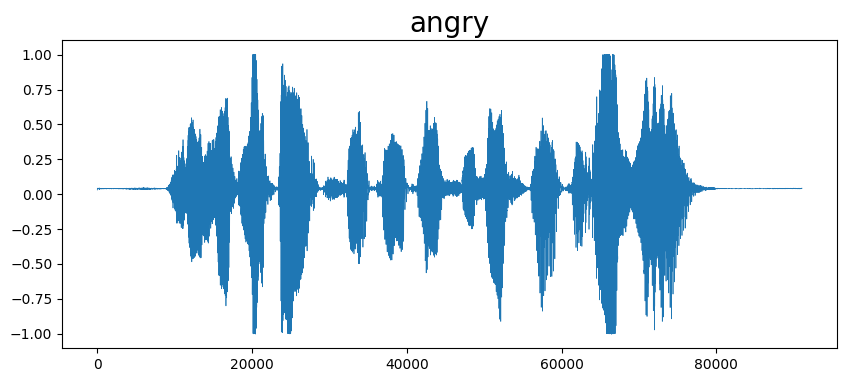

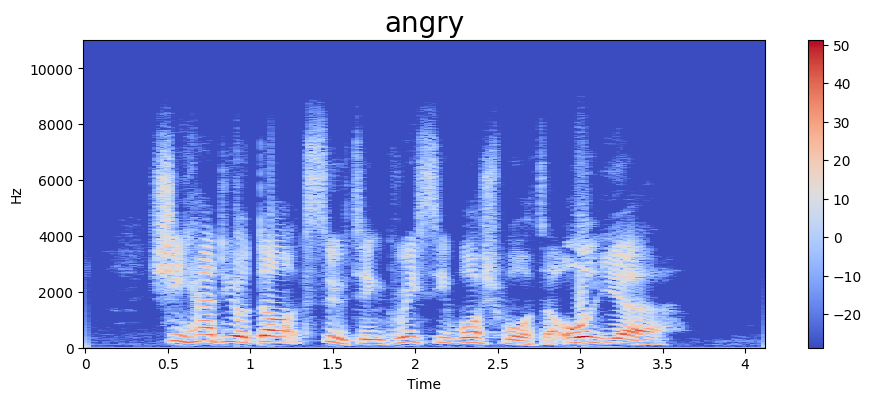

In [18]:
# Specify the emotion to analyze
emotion = 'angry'

# Select a path based on the specified emotion
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Create a waveform plot for the selected audio
waveplot(data, sampling_rate, emotion)

# Create a spectrogram for the selected audio
spectrogram(data, sampling_rate, emotion)

# Display the audio for the selected path
Audio(path)

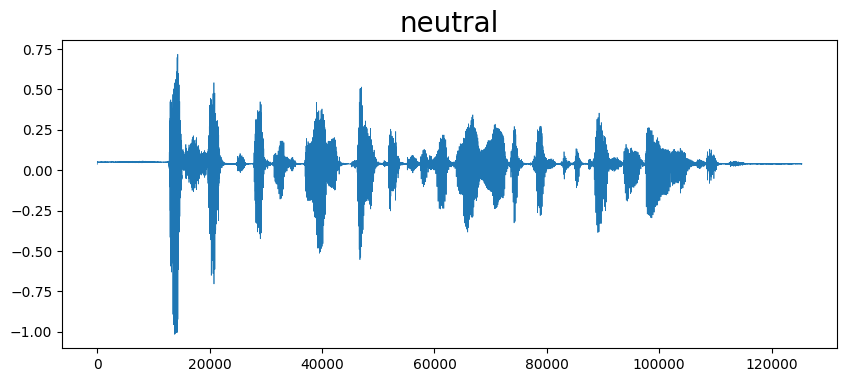

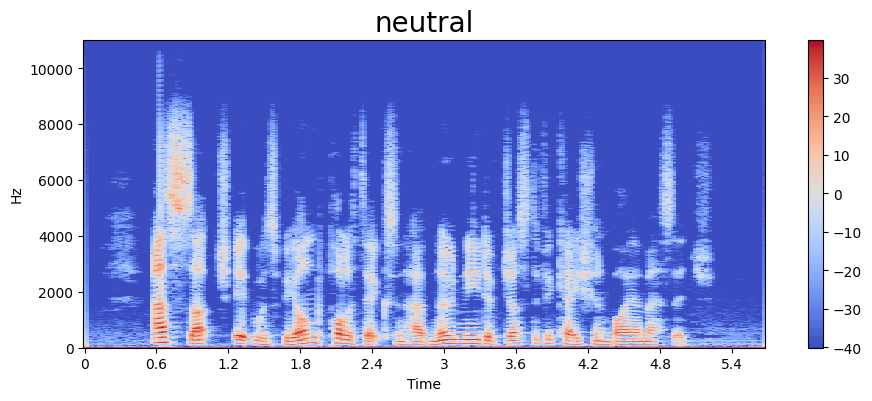

In [19]:
# Specify the emotion to analyze
emotion = 'neutral'

# Select a path based on the specified emotion
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Create a waveform plot for the selected audio
waveplot(data, sampling_rate, emotion)

# Create a spectrogram for the selected audio
spectrogram(data, sampling_rate, emotion)

# Display the audio for the selected path
Audio(path)

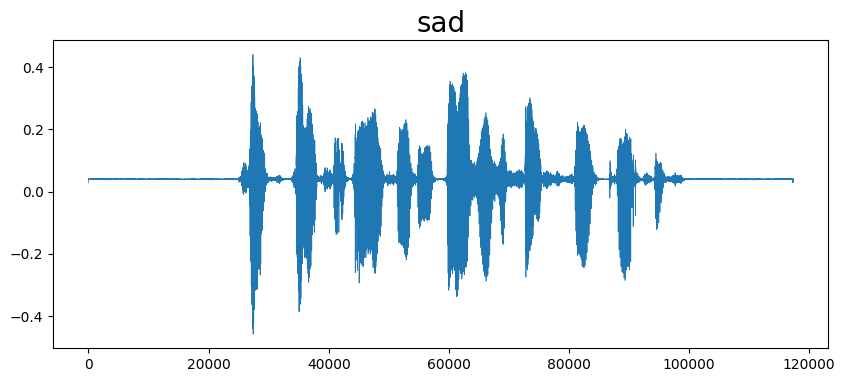

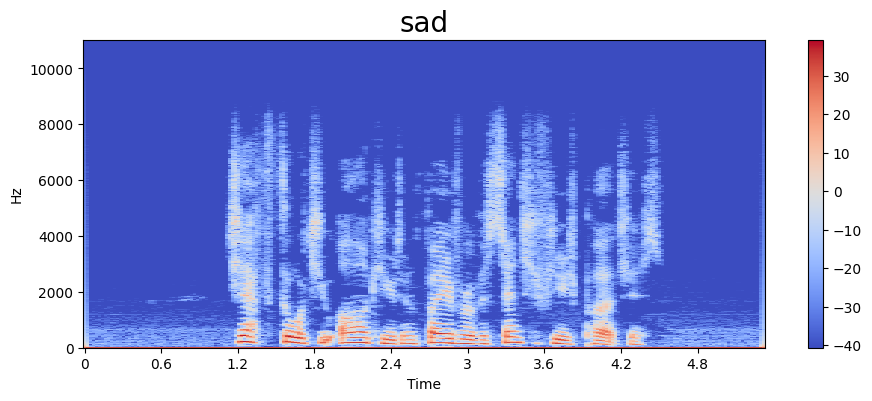

In [20]:
# Specify the emotion to analyze
emotion = 'sad'

# Select a path based on the specified emotion
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Create a waveform plot for the selected audio
waveplot(data, sampling_rate, emotion)

# Create a spectrogram for the selected audio
spectrogram(data, sampling_rate, emotion)

# Display the audio for the selected path
Audio(path)

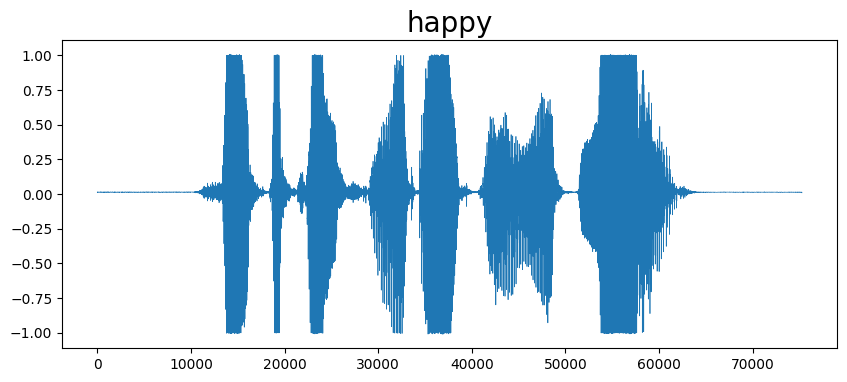

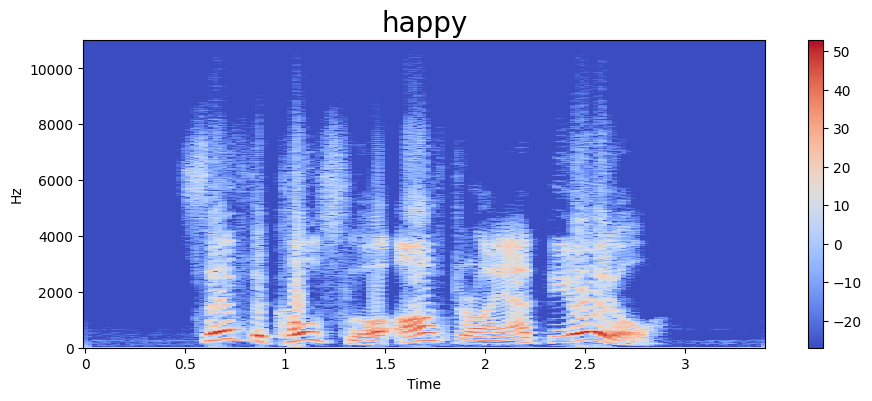

In [21]:
# Specify the emotion to analyze
emotion = 'happy'

# Select a path based on the specified emotion
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Create a waveform plot for the selected audio
waveplot(data, sampling_rate, emotion)

# Create a spectrogram for the selected audio
spectrogram(data, sampling_rate, emotion)

# Display the audio for the selected path
Audio(path)

### Feature Extraction

In [22]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [23]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [24]:
X_mfcc

0       [-214.69621, 128.7828, 1.7986201, 51.555283, -...
1       [-327.4453, 131.2475, 11.32008, 54.972492, -11...
2       [-394.55798, 111.40005, 29.9073, 56.59251, 2.3...
3       [-266.296, 146.41937, -5.59072, 31.523836, -10...
4       [-394.31226, 150.90811, 12.915925, 35.460224, ...
                              ...                        
2307    [-432.75977, 138.07976, -0.47164702, 65.20622,...
2308    [-415.7321, 140.10744, 17.39227, 42.713543, -1...
2309    [-444.4921, 139.71066, 12.050123, 60.19431, -1...
2310    [-242.48978, 111.04384, -24.815582, 45.390205,...
2311    [-381.63556, 153.18712, -7.7243943, 45.334557,...
Name: speech, Length: 7472, dtype: object

In [25]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(7472, 40)

In [26]:
## input split
X = np.expand_dims(X, -1)
X.shape

(7472, 40, 1)

In [27]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [28]:
y = y.toarray()

In [29]:
y.shape

(7472, 4)

#### Split Training and Test Set

In [30]:
from sklearn.model_selection import train_test_split

# Split your features (X) and labels (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## LSTM Model Development

In [33]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras.optimizers import Adam

model = Sequential([
    LSTM(512, return_sequences=False, input_shape=(40,1)),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(4, activation='softmax')
])
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 512)               1052672   
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

### Train the model

In [34]:
from keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint('voice_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model with the ModelCheckpoint callback
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, callbacks=[model_checkpoint])

Epoch 1/50
369/374 [============================>.] - ETA: 0s - loss: 1.4225 - accuracy: 0.3565
Epoch 1: val_accuracy improved from -inf to 0.49231, saving model to voice_model.h5
374/374 [==============================] - 20s 13ms/step - loss: 1.4201 - accuracy: 0.3570 - val_loss: 1.1629 - val_accuracy: 0.4923
Epoch 2/50
374/374 [==============================] - ETA: 0s - loss: 1.1335 - accuracy: 0.4910
Epoch 2: val_accuracy improved from 0.49231 to 0.60134, saving model to voice_model.h5
374/374 [==============================] - 4s 10ms/step - loss: 1.1335 - accuracy: 0.4910 - val_loss: 0.9111 - val_accuracy: 0.6013
Epoch 3/50
373/374 [============================>.] - ETA: 0s - loss: 1.0139 - accuracy: 0.5511
Epoch 3: val_accuracy did not improve from 0.60134
374/374 [==============================] - 4s 10ms/step - loss: 1.0140 - accuracy: 0.5509 - val_loss: 1.0414 - val_accuracy: 0.5518
Epoch 4/50
374/374 [==============================] - ETA: 0s - loss: 0.9525 - accuracy: 0.57

## Model Evaluation

### Classification Report and Confusion Matrix

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Get the classification report
report = classification_report(y_true, y_pred_classes)
print(report)

# Get the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)


47/47 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       379
           1       0.59      0.65      0.62       385
           2       0.58      0.71      0.64       342
           3       0.91      0.54      0.68       389

    accuracy                           0.67      1495
   macro avg       0.70      0.68      0.67      1495
weighted avg       0.70      0.67      0.67      1495

[[303  63  12   1]
 [ 83 252  45   5]
 [ 15  69 243  15]
 [ 15  43 122 209]]


### Plot Images of Training and Validation

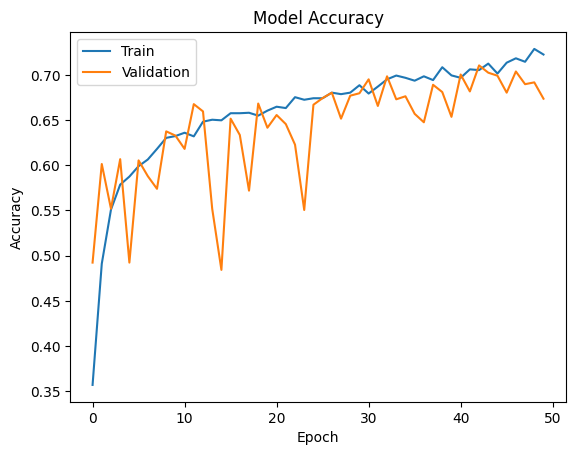

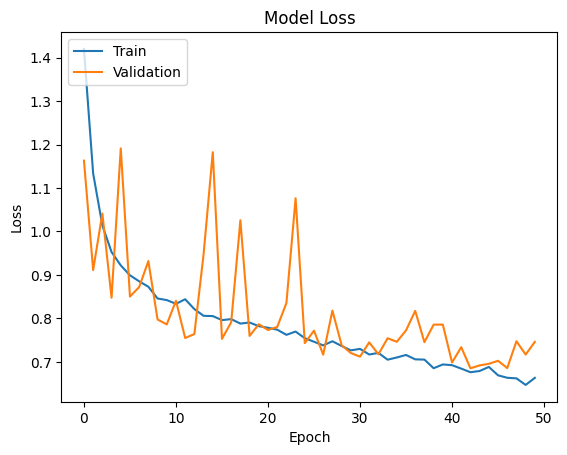

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [37]:
import librosa
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import OneHotEncoder

In [40]:
# Load the trained emotion recognition model
model = load_model('/content/voice_model.h5')

# Load the encoder for emotion labels
## load the same encoder that was used during model training
## Define the emotion labels here (in the same order as used during training)
emotion_labels = ['angry', 'neutral', 'sad', 'happy']
enc = OneHotEncoder(sparse_output=False)
enc.fit(np.array(emotion_labels).reshape(-1, 1))

# Create a mapping from emotion labels to integers
label_to_int = {label: i for i, label in enumerate(emotion_labels)}

# Function to extract MFCC features from an audio segment
def extract_mfcc(y, sr):
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

# Function to predict emotion for a single segment
def predict_emotion(segment):
    # Extract MFCC features
    mfcc = extract_mfcc(segment, sampling_rate)

    # Reshape for model input
    mfcc = mfcc.reshape(1, mfcc.shape[0], 1)

    # Predict emotion
    emotion_probabilities = model.predict(mfcc)

    return emotion_probabilities


# Load a audio file (replace with the audio file)
audio_path = '/content/dataset/SAVEE/ALL/JE_sa10.wav'

# Split long audio into overlapping segments
segment_length = 3  # Length of each segment in seconds
overlap = 0.0  # Overlap between segments in seconds
sampling_rate = 22050  # Replace with the appropriate sampling rate
segments = []

# Split the audio into overlapping segments
y, _ = librosa.load(audio_path, sr=sampling_rate)
for start in np.arange(0, len(y), int((segment_length - overlap) * sampling_rate)):
    end = int(start + segment_length * sampling_rate)
    segment = y[start:end]
    segments.append(segment)

# Predict emotions for all segments
emotion_predictions = []
for segment in segments:
    emotion_probabilities = predict_emotion(segment)
    emotion_predictions.append(emotion_probabilities)

# Convert aggregated probabilities to emotion labels for all segments
emotion_labels_for_segments = [enc.inverse_transform(emotion_probabilities).flatten()[0] for emotion_probabilities in emotion_predictions]

# Calculate the percentage of each emotion
total_segments = len(emotion_labels_for_segments)
emotion_percentages = {label: emotion_labels_for_segments.count(label) / total_segments * 100 for label in set(emotion_labels_for_segments)}

# Return the emotions and their percentages
emotions_and_percentages = {emotion: percentage for emotion, percentage in emotion_percentages.items()}

for emotion, percentage in emotions_and_percentages.items():
    print(f'{emotion}: {percentage:.2f}%')

1/1 [==============================] - 0s 60ms/step
sad: 50.00%
neutral: 50.00%


In [41]:
import librosa
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model

# Load the trained emotion recognition model
model = load_model('/content/voice_model.h5')

# Load the encoder for emotion labels
## load the same encoder that was used during model training
## Define the emotion labels here (in the same order as used during training)
emotion_labels = ['angry', 'neutral', 'sad',  'happy']
enc = OneHotEncoder(sparse_output=False)
enc.fit(np.array(emotion_labels).reshape(-1, 1))

# Create a mapping from emotion labels to integers
label_to_int = {label: i for i, label in enumerate(emotion_labels)}

# Function to extract MFCC features from an audio segment
def extract_mfcc(y, sr):
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

# Function to predict emotion for a single segment
def predict_emotion(segment):
    # Extract MFCC features
    mfcc = extract_mfcc(segment, sampling_rate)

    # Reshape for model input
    mfcc = mfcc.reshape(1, mfcc.shape[0], 1)

    # Predict emotion
    emotion_probabilities = model.predict(mfcc)

    return emotion_probabilities


# Load an audio file (replace with the audio file)
audio_path = '/content/dataset/SAVEE/ALL/JE_sa10.wav'

# Split long audio into overlapping segments
segment_length = 3  # Length of each segment in seconds
overlap = 0.0  # Overlap between segments in seconds
sampling_rate = 22050  # Replace with the appropriate sampling rate
segments = []

# Split the audio into overlapping segments
y, _ = librosa.load(audio_path, sr=sampling_rate)
for start in np.arange(0, len(y), int((segment_length - overlap) * sampling_rate)):
    end = int(start + segment_length * sampling_rate)
    segment = y[start:end]
    segments.append(segment)

# Predict emotions for all segments
emotion_predictions = []
for segment in segments:
    emotion_probabilities = predict_emotion(segment)
    emotion_predictions.append(emotion_probabilities)

# Find the best-matching emotion label
best_matching_emotion_index = np.argmax(np.sum(emotion_predictions, axis=0))
best_matching_emotion_label = emotion_labels[best_matching_emotion_index]

# Return the best-matching emotion label
print(f'Best Matching Emotion: {best_matching_emotion_label}')


1/1 [==============================] - 0s 27ms/step
Best Matching Emotion: sad


-----------------------